<a href="https://colab.research.google.com/github/abdulgaffarshaik/AI-Driven-Cybersecurity-Threat-Prediction-Platform/blob/master/pythontask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Write Python code to remove duplicate log entries from a dataset of cybersecurity events.

In [1]:
import pandas as pd
import numpy as np

# Create dummy cybersecurity dataset
np.random.seed(42)
df = pd.DataFrame({
    "user": np.random.choice(["alice","bob","charlie"], 10),
    "ip_address": ["192.168.1."+str(i%5) for i in range(10)],
    "attack_type": np.random.choice(["DoS","Probe"], 10),
    "src_bytes": np.random.randint(0, 5000, 10)
})

# Add duplicates
df = pd.concat([df, df.iloc[:3]], ignore_index=True)
print("Before removing duplicates:")
print(df)

# Remove duplicate log entries
df = df.drop_duplicates()
print("\nAfter removing duplicates:")
print(df)


Before removing duplicates:
       user   ip_address attack_type  src_bytes
0   charlie  192.168.1.0         DoS        769
1     alice  192.168.1.1         DoS       2391
2   charlie  192.168.1.2       Probe       2433
3   charlie  192.168.1.3         DoS       1184
4     alice  192.168.1.4       Probe       4555
5     alice  192.168.1.0       Probe       3385
6   charlie  192.168.1.1       Probe       4117
7       bob  192.168.1.2         DoS       4843
8   charlie  192.168.1.3       Probe       2904
9   charlie  192.168.1.4         DoS        474
10  charlie  192.168.1.0         DoS        769
11    alice  192.168.1.1         DoS       2391
12  charlie  192.168.1.2       Probe       2433

After removing duplicates:
      user   ip_address attack_type  src_bytes
0  charlie  192.168.1.0         DoS        769
1    alice  192.168.1.1         DoS       2391
2  charlie  192.168.1.2       Probe       2433
3  charlie  192.168.1.3         DoS       1184
4    alice  192.168.1.4       Probe  

2. Write Python code to handle missing values in cybersecurity logs by filling them with median values.

In [2]:
# Introduce missing values
df.loc[2, "src_bytes"] = np.nan

print("Before handling missing values:")
print(df)

# Fill missing values with median
df = df.fillna(df.median(numeric_only=True))

print("\nAfter filling missing values with median:")
print(df)


Before handling missing values:
      user   ip_address attack_type  src_bytes
0  charlie  192.168.1.0         DoS      769.0
1    alice  192.168.1.1         DoS     2391.0
2  charlie  192.168.1.2       Probe        NaN
3  charlie  192.168.1.3         DoS     1184.0
4    alice  192.168.1.4       Probe     4555.0
5    alice  192.168.1.0       Probe     3385.0
6  charlie  192.168.1.1       Probe     4117.0
7      bob  192.168.1.2         DoS     4843.0
8  charlie  192.168.1.3       Probe     2904.0
9  charlie  192.168.1.4         DoS      474.0

After filling missing values with median:
      user   ip_address attack_type  src_bytes
0  charlie  192.168.1.0         DoS      769.0
1    alice  192.168.1.1         DoS     2391.0
2  charlie  192.168.1.2       Probe     2904.0
3  charlie  192.168.1.3         DoS     1184.0
4    alice  192.168.1.4       Probe     4555.0
5    alice  192.168.1.0       Probe     3385.0
6  charlie  192.168.1.1       Probe     4117.0
7      bob  192.168.1.2         

3. Write Python code to normalize and standardize IP addresses in cybersecurity data.

In [3]:
# Add some irregular IPs
df["ip_address"] = ["192.168.001."+str(i) for i in range(len(df))]

print("Before normalization:")
print(df["ip_address"].head())

# Normalize IPs (remove leading zeros)
df["ip_address"] = df["ip_address"].apply(
    lambda x: ".".join([str(int(part)) for part in x.split(".")])
)

print("\nAfter normalization:")
print(df["ip_address"].head())

Before normalization:
0    192.168.001.0
1    192.168.001.1
2    192.168.001.2
3    192.168.001.3
4    192.168.001.4
Name: ip_address, dtype: object

After normalization:
0    192.168.1.0
1    192.168.1.1
2    192.168.1.2
3    192.168.1.3
4    192.168.1.4
Name: ip_address, dtype: object


4. Write Python code to filter out corrupted log records (e.g., negative byte counts).

In [5]:
# Add corrupted values
df.loc[1, "src_bytes"] = -50

print("Before filtering corrupted records:")
print(df[["user","src_bytes"]])

# Filter out corrupted records
df = df[df["src_bytes"] >= 0]

print("\nAfter filtering corrupted records:")
print(df[["user","src_bytes"]])

Before filtering corrupted records:
      user  src_bytes
0  charlie      769.0
2  charlie     2904.0
3  charlie     1184.0
4    alice     4555.0
5    alice     3385.0
6  charlie     4117.0
7      bob     4843.0
8  charlie     2904.0
9  charlie      474.0
1      NaN      -50.0

After filtering corrupted records:
      user  src_bytes
0  charlie      769.0
2  charlie     2904.0
3  charlie     1184.0
4    alice     4555.0
5    alice     3385.0
6  charlie     4117.0
7      bob     4843.0
8  charlie     2904.0
9  charlie      474.0


5. Write Python code to standardize timestamp formats in network traffic logs.

In [7]:
# Add sequential timestamps with 1-minute frequency
df["timestamp"] = pd.date_range(start="2023-01-01", periods=len(df), freq="min")

print("Standardized timestamps:")
print(df[["timestamp"]].head())


Standardized timestamps:
            timestamp
0 2023-01-01 00:00:00
2 2023-01-01 00:01:00
3 2023-01-01 00:02:00
4 2023-01-01 00:03:00
5 2023-01-01 00:04:00


6. Write Python code to clean threat intelligence text by removing special characters and converting to lowercase.

In [10]:
import pandas as pd

# Example df (if not already defined)
df = pd.DataFrame({"id": range(1, 10)})

# Add messy text column (repeat enough times and then trim to match df length)
texts = [
    "Suspicious!! Login### Attempt??",
    "Malicious*** Payload@@ Detected!!!",
    "Failed### Login--- Attack%%%!"
]

df["threat_text"] = (texts * ((len(df) // len(texts)) + 1))[:len(df)]

# Clean threat text
df["threat_text_clean"] = df["threat_text"].str.replace(r"[^a-zA-Z ]", "", regex=True).str.lower()

# Display as a table
print("Threat Intelligence Logs (Before & After Cleaning):")
from IPython.display import display
display(df[["threat_text", "threat_text_clean"]].head(10))


Threat Intelligence Logs (Before & After Cleaning):


,threat_text,threat_text_clean
0,Suspicious!! Login### Attempt??,suspicious login attempt
1,Malicious*** Payload@@ Detected!!!,malicious payload detected
2,Failed### Login--- Attack%%%!,failed login attack
3,Suspicious!! Login### Attempt??,suspicious login attempt
4,Malicious*** Payload@@ Detected!!!,malicious payload detected
5,Failed### Login--- Attack%%%!,failed login attack
6,Suspicious!! Login### Attempt??,suspicious login attempt
7,Malicious*** Payload@@ Detected!!!,malicious payload detected
8,Failed### Login--- Attack%%%!,failed login attack


7. Write Python code to detect and remove outliers in failed login attempts using the IQR method.

In [11]:
# Add failed logins column
df["num_failed_logins"] = np.random.randint(0, 10, len(df))

print("Before outlier removal:")
print(df[["num_failed_logins"]].describe())

# IQR method
Q1 = df["num_failed_logins"].quantile(0.25)
Q3 = df["num_failed_logins"].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df["num_failed_logins"] < (Q1 - 1.5*IQR)) |
          (df["num_failed_logins"] > (Q3 + 1.5*IQR)))]

print("\nAfter outlier removal:")
print(df[["num_failed_logins"]].describe())


Before outlier removal:
       num_failed_logins
count           9.000000
mean            4.666667
std             2.692582
min             2.000000
25%             2.000000
50%             4.000000
75%             6.000000
max             9.000000

After outlier removal:
       num_failed_logins
count           9.000000
mean            4.666667
std             2.692582
min             2.000000
25%             2.000000
50%             4.000000
75%             6.000000
max             9.000000


8. Write Python code to count and visualize failed vs successful login attempts per user.

Failed vs Successful Login Attempts per User:


,num_failed_logins,num_success_logins
user,,
alice,205,408
bob,181,466
charlie,185,505
david,228,541


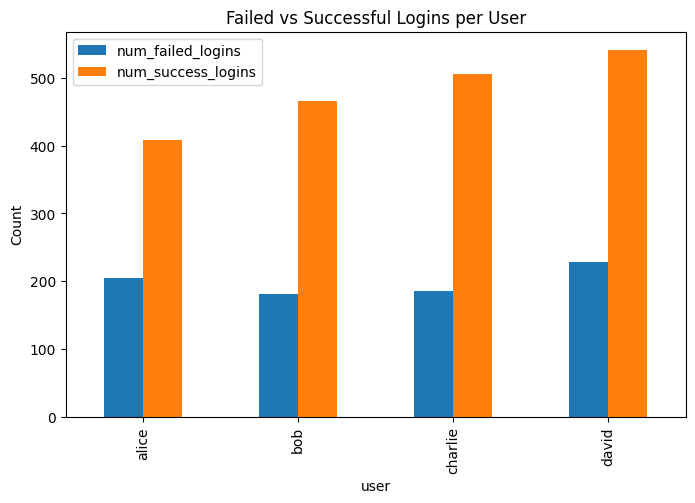

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dummy dataset
np.random.seed(42)
df = pd.DataFrame({
    "user": np.random.choice(["alice","bob","charlie","david"], 200),
    "num_failed_logins": np.random.randint(0, 10, 200),
    "num_success_logins": np.random.randint(0, 20, 200)
})

# Count logins
login_counts = df.groupby("user")[["num_failed_logins","num_success_logins"]].sum()

print("Failed vs Successful Login Attempts per User:")
from IPython.display import display
display(login_counts)

# Visualization
login_counts.plot(kind="bar", figsize=(8,5))
plt.title("Failed vs Successful Logins per User")
plt.ylabel("Count")
plt.show()


9. Write Python code to find and visualize the top 10 most frequent cyber attack types.

Top 10 Most Frequent Attack Types:


,count
attack_type,
Phishing,35
DoS,29
U2R,26
XSS,23
SQLi,23
Probe,22
MITM,21
R2L,21


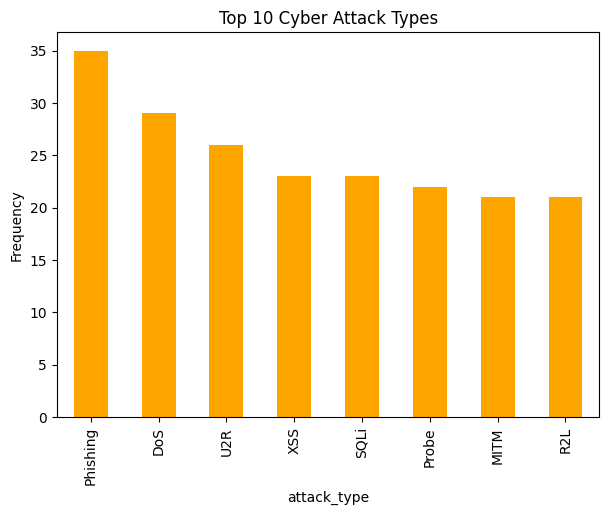

In [13]:
# Dummy dataset
df["attack_type"] = np.random.choice(["DoS","Probe","R2L","U2R","Phishing","SQLi","XSS","MITM"], 200)

# Top 10
attack_counts = df["attack_type"].value_counts().head(10)

print("Top 10 Most Frequent Attack Types:")
display(attack_counts)

# Visualization
attack_counts.plot(kind="bar", color="orange", figsize=(7,5))
plt.title("Top 10 Cyber Attack Types")
plt.ylabel("Frequency")
plt.show()


10. Write Python code to visualize network traffic patterns by plotting source vs destination bytes.

Sample of Network Traffic Logs:


,src_bytes,dst_bytes
0,3636,6402
1,2724,3744
2,4809,901
3,4178,4785
4,2048,2039


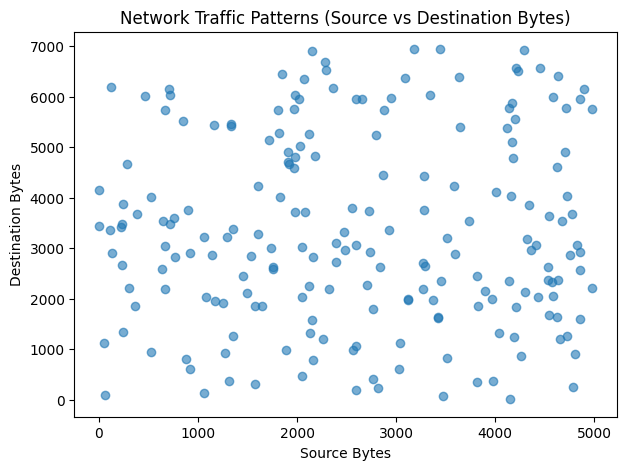

In [14]:
# Dummy dataset
df["src_bytes"] = np.random.randint(0, 5000, 200)
df["dst_bytes"] = np.random.randint(0, 7000, 200)

print("Sample of Network Traffic Logs:")
display(df[["src_bytes","dst_bytes"]].head())

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(df["src_bytes"], df["dst_bytes"], alpha=0.6)
plt.title("Network Traffic Patterns (Source vs Destination Bytes)")
plt.xlabel("Source Bytes")
plt.ylabel("Destination Bytes")
plt.show()


11. Write Python code to calculate anomaly scores (z-score) for failed logins and visualize their distribution.

Failed Logins with Anomaly Scores:


,user,num_failed_logins,anomaly_score
0,charlie,6,0.709545
1,david,0,-1.413781
2,alice,3,-0.352118
3,charlie,3,-0.352118
4,charlie,4,0.001769
5,david,6,0.709545
6,alice,6,0.709545
7,alice,3,-0.352118
8,charlie,6,0.709545
9,bob,2,-0.706006


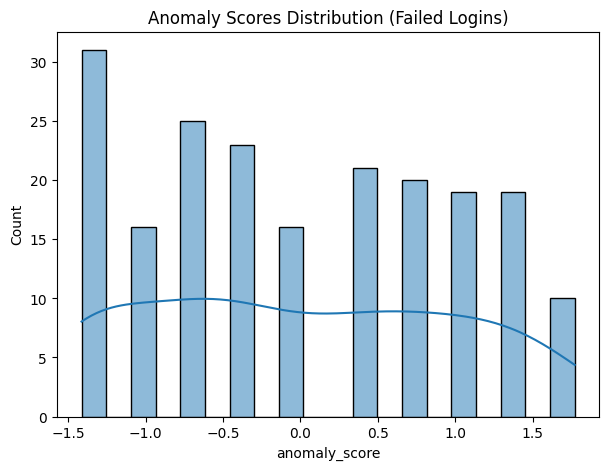

In [15]:
# Anomaly scores (Z-score)
df["anomaly_score"] = (df["num_failed_logins"] - df["num_failed_logins"].mean()) / df["num_failed_logins"].std()

print("Failed Logins with Anomaly Scores:")
display(df[["user","num_failed_logins","anomaly_score"]].head(10))

# Visualization
import seaborn as sns
plt.figure(figsize=(7,5))
sns.histplot(df["anomaly_score"], bins=20, kde=True)
plt.title("Anomaly Scores Distribution (Failed Logins)")
plt.show()

12. Write Python code to cluster IP addresses based on access frequency using K-Means and visualize results.

Clustering Results for IP Access Frequency:


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


,ip_address,access_count,cluster
0,192.168.1.0,4,0
1,192.168.1.1,4,0
2,192.168.1.2,4,0
3,192.168.1.3,4,0
4,192.168.1.4,4,0
5,192.168.1.5,4,0
6,192.168.1.6,4,0
7,192.168.1.7,4,0
8,192.168.1.8,4,0
9,192.168.1.9,4,0


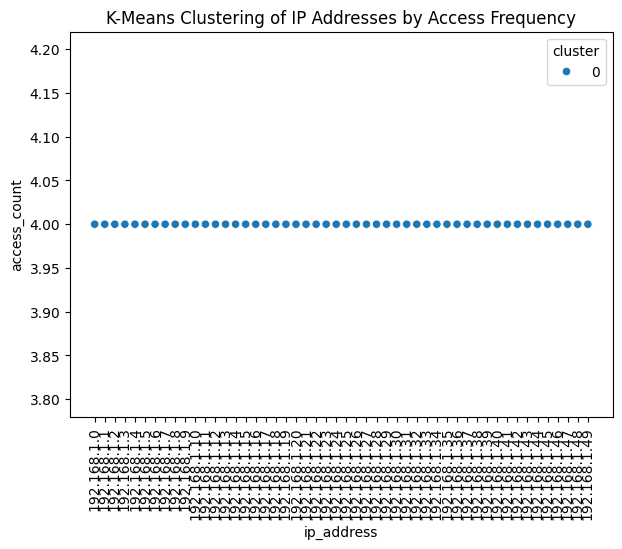

In [16]:
from sklearn.cluster import KMeans
import seaborn as sns

# Dummy IPs
df["ip_address"] = ["192.168.1."+str(i%50) for i in range(len(df))]

# Count accesses
ip_counts = df["ip_address"].value_counts().reset_index()
ip_counts.columns = ["ip_address","access_count"]

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
ip_counts["cluster"] = kmeans.fit_predict(ip_counts[["access_count"]])

print("Clustering Results for IP Access Frequency:")
display(ip_counts.head(10))

# Visualization
plt.figure(figsize=(7,5))
sns.scatterplot(data=ip_counts, x="ip_address", y="access_count", hue="cluster", palette="tab10")
plt.xticks(rotation=90)
plt.title("K-Means Clustering of IP Addresses by Access Frequency")
plt.show()

13. Write Python code to analyze and visualize port scanning attempts.

Port Scanning Attempts:


,count
port,
3389,33
21,33
23,30
443,28
22,28
80,25
25,23


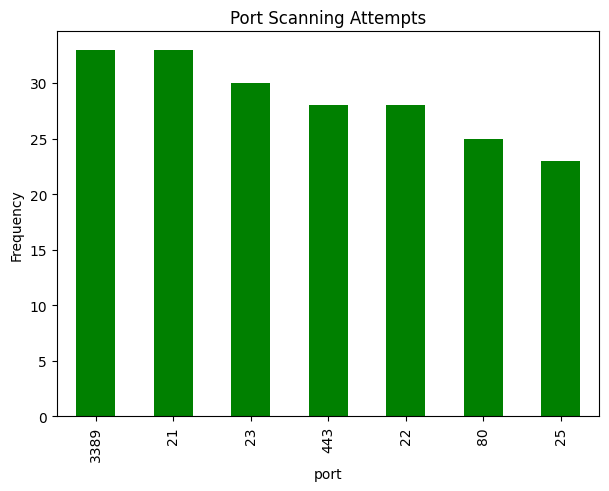

In [17]:
# Dummy ports
df["port"] = np.random.choice([21,22,23,25,80,443,3389], len(df))

# Count ports
port_counts = df["port"].value_counts()

print("Port Scanning Attempts:")
display(port_counts)

# Visualization
port_counts.plot(kind="bar", figsize=(7,5), color="green")
plt.title("Port Scanning Attempts")
plt.ylabel("Frequency")
plt.show()


14. Write Python code to compute and visualize correlation between attack types and source countries using a heatmap.

Attack Type vs Source Country Correlation Table:


country,BR,CN,IN,RU,US
attack_type,,,,,
DoS,6,4,4,8,7
MITM,5,6,1,4,5
Phishing,10,8,6,4,7
Probe,5,10,1,3,3
R2L,6,4,3,2,6
SQLi,4,3,8,3,5
U2R,2,6,5,6,7
XSS,6,4,2,9,2


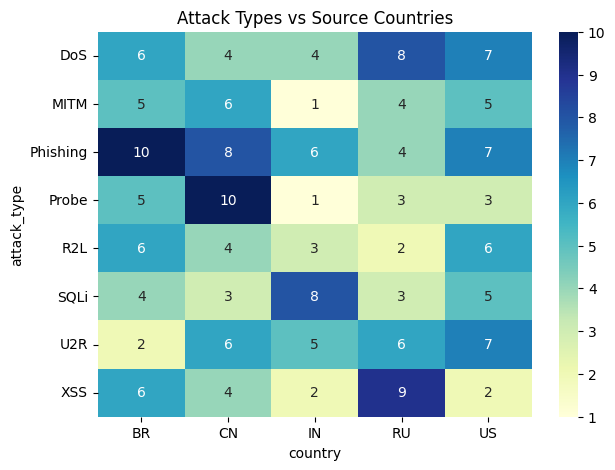

In [18]:
# Dummy country data
df["country"] = np.random.choice(["US","CN","RU","IN","BR"], len(df))

# Crosstab
attack_country = pd.crosstab(df["attack_type"], df["country"])

print("Attack Type vs Source Country Correlation Table:")
display(attack_country)

# Visualization
plt.figure(figsize=(7,5))
sns.heatmap(attack_country, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Attack Types vs Source Countries")
plt.show()


15. Write Python code to train a Decision Tree classifier for predicting malicious vs benign network events.

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59        47
           1       0.54      0.49      0.51        43

    accuracy                           0.56        90
   macro avg       0.55      0.55      0.55        90
weighted avg       0.55      0.56      0.55        90



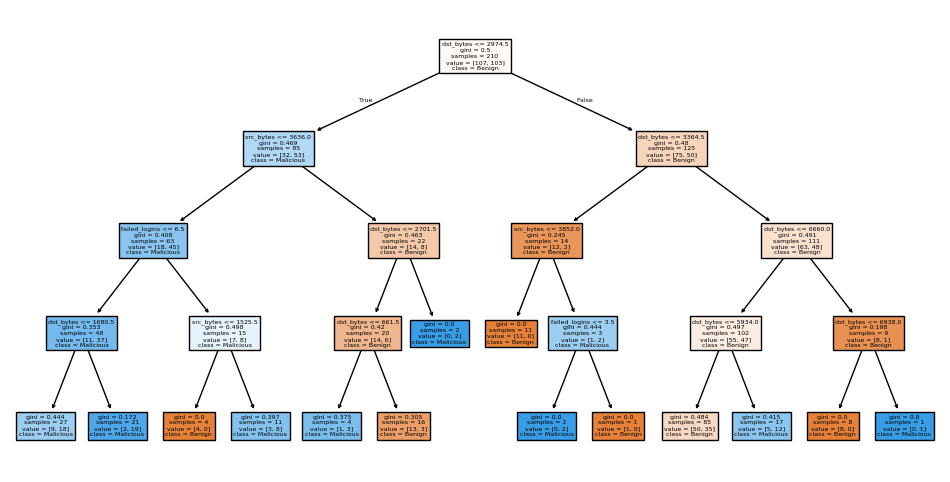

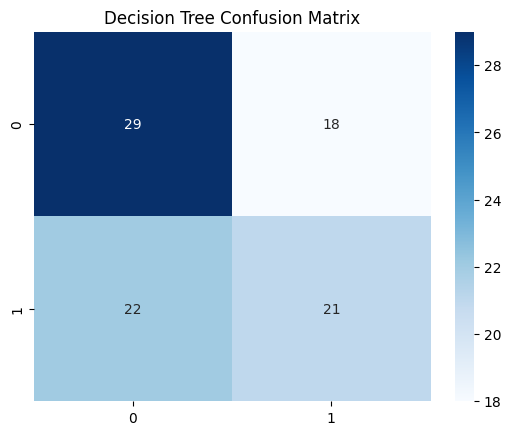

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dummy dataset
np.random.seed(42)
df = pd.DataFrame({
    "src_bytes": np.random.randint(0, 5000, 300),
    "dst_bytes": np.random.randint(0, 7000, 300),
    "failed_logins": np.random.randint(0, 10, 300),
    "malicious": np.random.choice([0,1], 300)  # 0=benign, 1=malicious
})

X = df.drop("malicious", axis=1)
y = df["malicious"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(12,6))
plot_tree(dt, feature_names=X.columns, class_names=["Benign","Malicious"], filled=True)
plt.show()

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()


16. Write Python code to train a Random Forest classifier and visualize feature importance for intrusion detection.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        47
           1       0.49      0.42      0.45        43

    accuracy                           0.51        90
   macro avg       0.51      0.51      0.51        90
weighted avg       0.51      0.51      0.51        90

Feature Importances:


,0
dst_bytes,0.420528
src_bytes,0.408307
failed_logins,0.171165


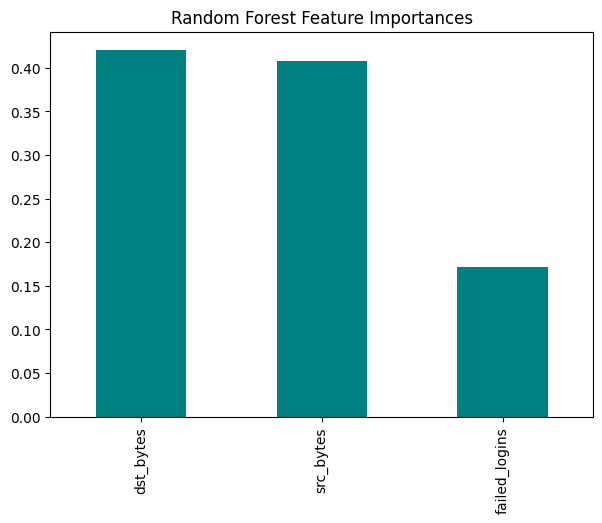

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Feature Importances:")
display(importances)

# Visualization
importances.plot(kind="bar", figsize=(7,5), color="teal")
plt.title("Random Forest Feature Importances")
plt.show()


17. Write Python code to build and train an LSTM model for sequential attack forecasting.

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


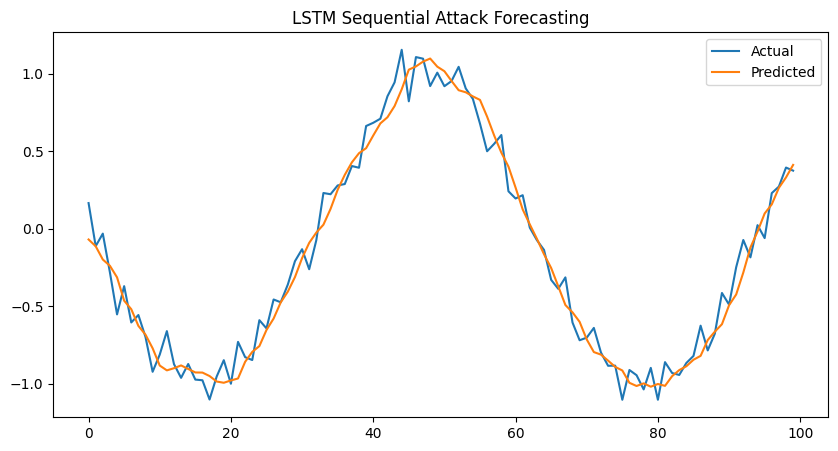

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

# Sequential dataset (time-series like failed login attempts)
seq_data = np.sin(np.arange(0, 200, 0.1)) + np.random.normal(0, 0.1, 2000)
seq_df = pd.DataFrame({"failed_logins": seq_data})

# Prepare sequences
def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(len(data)-seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(seq_df["failed_logins"].values)
X_seq = X_seq.reshape(X_seq.shape[0], X_seq.shape[1], 1)

# Train-test split
split = int(0.8*len(X_seq))
X_train, X_test, y_train, y_test = X_seq[:split], X_seq[split:], y_seq[:split], y_seq[split:]

# ✅ LSTM Model with Input layer (no warning)
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(50, activation="tanh"),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Predictions
y_pred_lstm = model.predict(X_test)

# Visualization
plt.figure(figsize=(10,5))
plt.plot(y_test[:100], label="Actual")
plt.plot(y_pred_lstm[:100], label="Predicted")
plt.legend()
plt.title("LSTM Sequential Attack Forecasting")
plt.show()


18. Write Python code to train a Logistic Regression model for predicting phishing attempts.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.54      0.54        46
           1       0.51      0.50      0.51        44

    accuracy                           0.52        90
   macro avg       0.52      0.52      0.52        90
weighted avg       0.52      0.52      0.52        90



,Feature,Coefficient
0,email_length,0.000576
1,num_links,-0.010764
2,num_images,-0.042084


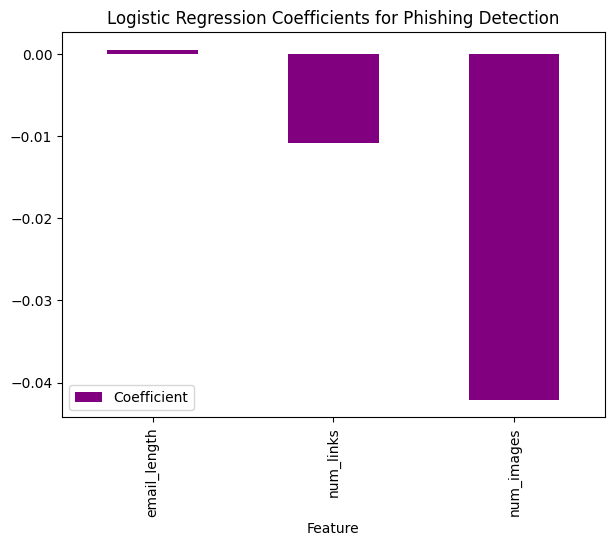

In [24]:
from sklearn.linear_model import LogisticRegression

# Dummy phishing dataset
df_phish = pd.DataFrame({
    "email_length": np.random.randint(50, 1000, 300),
    "num_links": np.random.randint(0, 20, 300),
    "num_images": np.random.randint(0, 10, 300),
    "phishing": np.random.choice([0,1], 300)  # 0=safe, 1=phishing
})

X = df_phish.drop("phishing", axis=1)
y = df_phish["phishing"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Coefficients Table
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": logreg.coef_[0]})
display(coef_df)

# Visualization
coef_df.set_index("Feature").plot(kind="bar", figsize=(7,5), color="purple")
plt.title("Logistic Regression Coefficients for Phishing Detection")
plt.show()


19. Write Python code to train a Multi-Layer Perceptron (MLP) to detect suspicious login attempts.

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.17      0.26        47
           1       0.49      0.86      0.62        43

    accuracy                           0.50        90
   macro avg       0.53      0.52      0.44        90
weighted avg       0.53      0.50      0.43        90



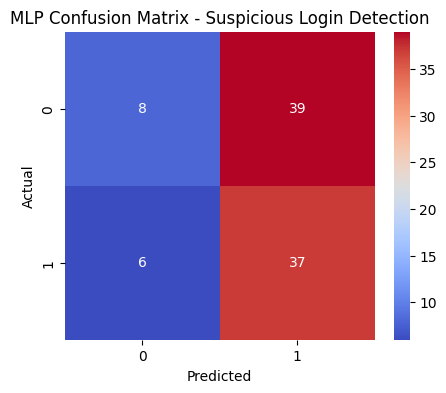

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -----------------------
# Dummy login dataset
# -----------------------
df_login = pd.DataFrame({
    "failed_logins": np.random.randint(0, 10, 300),
    "session_time": np.random.randint(1, 500, 300),
    "login_hour": np.random.randint(0, 24, 300),
    "suspicious": np.random.choice([0, 1], 300, p=[0.5, 0.5])  # force balance
})

X = df_login.drop("suspicious", axis=1)
y = df_login["suspicious"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -----------------------
# MLP Classifier
# -----------------------
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test)

# Classification Report (handle division by zero safely)
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp, zero_division=0))

# Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt="d", cmap="coolwarm")
plt.title("MLP Confusion Matrix - Suspicious Login Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


20. Write Python code to perform anomaly detection (zero-day attack prediction) using Isolation Forest.

Isolation Forest Results (1=Normal, -1=Anomaly):


,src_bytes,dst_bytes,failed_logins,anomaly
0,3883,5262,13,1
1,661,3932,11,1
2,1810,2028,11,1
3,414,362,11,1
4,342,2429,2,1


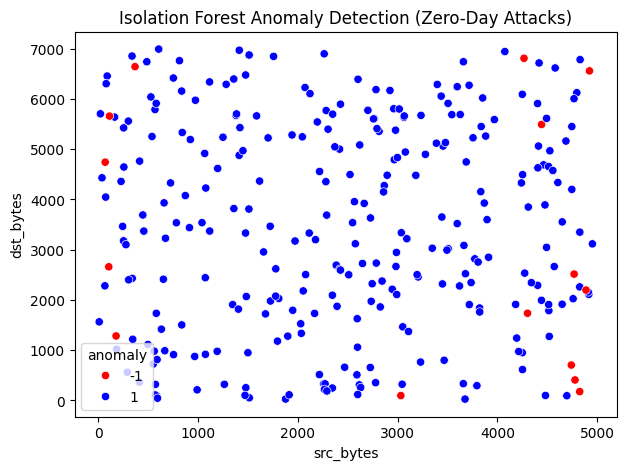

In [27]:
from sklearn.ensemble import IsolationForest

# Dummy dataset
df_iso = pd.DataFrame({
    "src_bytes": np.random.randint(0, 5000, 300),
    "dst_bytes": np.random.randint(0, 7000, 300),
    "failed_logins": np.random.randint(0, 15, 300)
})

iso = IsolationForest(contamination=0.05, random_state=42)
df_iso["anomaly"] = iso.fit_predict(df_iso)

print("Isolation Forest Results (1=Normal, -1=Anomaly):")
display(df_iso.head())

# Visualization
plt.figure(figsize=(7,5))
sns.scatterplot(x="src_bytes", y="dst_bytes", hue="anomaly", data=df_iso, palette={1:"blue",-1:"red"})
plt.title("Isolation Forest Anomaly Detection (Zero-Day Attacks)")
plt.show()
